### Análises estatísticas do estudo de caso entre os métodos: LightFM (híbrido), GraphSAGE e FastRP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, friedmanchisquare
import scikit_posthocs as sp
import numpy as np

In [2]:
# Valores de Precision para os 3 métodos em diferentes tamanhos de lista
lightfm_precision_10 = [0.1, 0.0, 0.1, 0.2, 0.3, 0.1, 0.1, 0.1, 0.2, 0.3, 0.3, 0.0, 0.0, 0.2, 0.1, 0.4, 0.3, 0.1, 0.0, 0.4, 0.1, 0.3, 0.1, 0.4, 0.4, 0.0, 0.1, 0.2, 0.1, 0.0]
graphsage_precision_10 = [0.04, 0.12, 0.06, 0.02, 0.06000000000000001, 0.48, 0.16, 0.0, 0.1, 0.1, 0.18, 0.04, 0.06000000000000001, 0.1, 0.41999999999999993, 0.22000000000000003, 0.41999999999999993, 0.20000000000000004, 0.08, 0.2, 0.38, 0.22000000000000003, 0.0, 0.64, 0.33999999999999997, 0.16, 0.14, 0.13999999999999999, 0.18, 0.06000000000000001]
fastrp_precision_10 = [0.1, 0.3, 0.0, 0.0, 0.0, 0.1, 0.4, 0.0, 0.2, 0.0, 0.5, 0.0, 0.0, 0.8, 0.2, 0.2, 0.0, 0.1, 0.0, 0.7, 0.4, 0.8, 0.0, 0.7, 0.8, 0.5, 0.0, 0.0, 0.0, 0.1]

lightfm_precision_20 = [0.2, 0.0, 0.15, 0.2, 0.2, 0.1, 0.1, 0.15, 0.25, 0.25, 0.25, 0.05, 0.0, 0.3, 0.15, 0.45, 0.3, 0.05, 0.05, 0.3, 0.05, 0.2, 0.05, 0.4, 0.4, 0.1, 0.15, 0.15, 0.1, 0.1]
graphsage_precision_20 = [0.05, 0.16999999999999998, 0.06, 0.02, 0.05, 0.39, 0.12, 0.02, 0.06, 0.13000000000000003, 0.14, 0.03, 0.06000000000000001, 0.09, 0.38, 0.18, 0.29000000000000004, 0.13000000000000003, 0.05, 0.18, 0.34, 0.22000000000000003, 0.01, 0.6300000000000001, 0.4, 0.16, 0.14, 0.18000000000000002, 0.13, 0.04]
fastrp_precision_20 = [0.15, 0.3, 0.0, 0.0, 0.15, 0.1, 0.35, 0.0, 0.2, 0.0, 0.65, 0.0, 0.1, 0.85, 0.2, 0.3, 0.05, 0.05, 0.0, 0.65, 0.2, 0.6, 0.05, 0.6, 0.75, 0.5, 0.0, 0.0, 0.0, 0.25]

lightfm_precision_50 = [0.24, 0.08, 0.24, 0.2, 0.2, 0.18, 0.1, 0.24, 0.36, 0.3, 0.24, 0.12, 0.1, 0.3, 0.12, 0.48, 0.2, 0.12, 0.16, 0.3, 0.12, 0.22, 0.12, 0.5, 0.46, 0.16, 0.26, 0.16, 0.1, 0.14]
graphsage_precision_50 = [0.07600000000000001, 0.124, 0.07200000000000001, 0.008, 0.028000000000000004, 0.33199999999999996, 0.11600000000000002, 0.032, 0.088, 0.11600000000000002, 0.164, 0.028000000000000004, 0.048, 0.11200000000000002, 0.26799999999999996, 0.172, 0.248, 0.084, 0.04, 0.192, 0.26400000000000007, 0.256, 0.016, 0.5319999999999999, 0.404, 0.20400000000000001, 0.11599999999999999, 0.188, 0.124, 0.02]
fastrp_precision_50 = [0.26, 0.26, 0.0, 0.0, 0.18, 0.16, 0.26, 0.0, 0.32, 0.08, 0.48, 0.0, 0.04, 0.72, 0.14, 0.28, 0.1, 0.06, 0.04, 0.64, 0.2, 0.64, 0.1, 0.58, 0.86, 0.5, 0.0, 0.04, 0.04, 0.16]


In [3]:
## Valores de NDCG para os 3 métodos em diferentes tamanhos de lista
lightfm_ndcg_10 = [0.13886244387355454, 0.0, 0.07336392209936005, 0.21222636597291458, 0.2973694836145356, 0.22009176629808017, 0.22009176629808017, 0.07336392209936005, 0.21726071285222986, 0.2685529228900211, 0.2735872697693364, 0.0, 0.0, 0.21222636597291458, 0.11004588314904008, 0.40741536676357565, 0.3340514446642156, 0.07336392209936005, 0.0, 0.3757677525932109, 0.06362078819895171, 0.2758471541718663, 0.07336392209936005, 0.5173633627401372, 0.5231737964779628, 0.0, 0.11004588314904008, 0.2863459897524692, 0.22009176629808017, 0.0]
graphsage_ndcg_10 = [0.05726919795049383, 0.13535866719058504, 0.08646362645419894, 0.012724157639790342, 0.07450265042333197, 0.5260370377197582, 0.1828398135701326, 0.0, 0.13747867655685814, 0.11344549816073013, 0.14769351789067067, 0.06297602613352618, 0.07450265042333197, 0.13602088547970823, 0.49175705632993, 0.24147039025208694, 0.48792625369966547, 0.2772969183085085, 0.1054212993281091, 0.19640910414757765, 0.39898442954103175, 0.273670279807101, 0.0, 0.6355890633094226, 0.3608392649500985, 0.18602288022757363, 0.17605005461487094, 0.16083063694032457, 0.2126233030191608, 0.08000464966185039]
fastrp_ndcg_10 = [0.63, 0.61, 0.0, 0.0, 0.0, 0.3, 0.63, 0.0, 0.54, 0.0, 0.92, 0.0, 0.0, 0.99, 0.8, 0.4, 0.0, 0.33, 0.0, 0.77, 0.94, 0.99, 0.0, 0.71, 0.97, 0.83, 0.0, 0.0, 0.0, 0.29]

lightfm_ndcg_20 = [0.1930620390390707, 0.0, 0.11845314056529317, 0.20405243092841763, 0.2266627278520837, 0.17437833078197715, 0.17490501020123428, 0.11443514372507416, 0.24453612504122593, 0.24040375161388872, 0.24365275471062, 0.03233829114831982, 0.0, 0.27447169117293896, 0.13622328153272548, 0.4424588661479067, 0.3155393295069234, 0.04734667987788577, 0.03475017269886857, 0.3136146988152395, 0.04105877938688906, 0.2135327563765326, 0.04734667987788577, 0.4754217619704539, 0.47659404756084595, 0.06708846384718839, 0.14307694288214187, 0.2171366432970087, 0.17437833078197715, 0.0711064606874074]
graphsage_ndcg_20 = [0.05794404915631581, 0.1674799969906204, 0.07726722923467946, 0.014679414107041776, 0.06321985566330927, 0.44747491009327367, 0.14518408388258658, 0.013637532816716414, 0.09519190718894555, 0.12890295788944853, 0.1307844540077281, 0.04759270554211155, 0.06869808453683934, 0.11560728264264268, 0.435217740059478, 0.20510050655805356, 0.37282174026712844, 0.20096644236494274, 0.07450312264824765, 0.1827487797044156, 0.3659021640077632, 0.2549990167830317, 0.006950034539773714, 0.6307803494544576, 0.3961427837175511, 0.1754279900912224, 0.16373001517279204, 0.18414426236637457, 0.16537012811641008, 0.058444983067931514]
fastrp_ndcg_20 = [0.52, 0.62, 0.0, 0.0, 0.36, 0.35, 0.65, 0.0, 0.54, 0.0, 0.88, 0.0, 0.3, 0.98, 0.7, 0.49, 0.26, 0.33, 0.0, 0.8, 0.94, 0.96, 0.23, 0.75, 0.96, 0.83, 0.0, 0.0, 0.0, 0.43]

lightfm_ndcg_50 = [0.22380634081601208, 0.06085817747223398, 0.19990748195975938, 0.19978029025934602, 0.2162978797670039, 0.2012681146857373, 0.14061992286578895, 0.19659745620360541, 0.32710057503232853, 0.28476704873434655, 0.2384148119729822, 0.09491255248025589, 0.07458477389836145, 0.28690679513437073, 0.11778552906223853, 0.4675451302888097, 0.23240520231253645, 0.10288385785120392, 0.12712263321526143, 0.30721606757842457, 0.10030526197387649, 0.22298858037462752, 0.10088215951255598, 0.5175125013413779, 0.48392483167413786, 0.12167060672276356, 0.22494154895084142, 0.19425316788974017, 0.139809206155876, 0.11648672797813488]
graphsage_ndcg_50 = [0.07321314051966588, 0.13404699467619574, 0.07890735879352416, 0.00801280483879191, 0.040871271462407474, 0.37907584650999854, 0.13090665096781548, 0.024787534752052722, 0.09935184502672506, 0.11796209706201652, 0.15304578871128408, 0.03765072953625393, 0.05628792300387834, 0.12101606993985956, 0.32609940572840745, 0.18843089130139093, 0.30393044722992285, 0.13380099297321243, 0.056028010635217174, 0.1897885780213282, 0.2954773803339571, 0.2681933456067874, 0.012587588824295674, 0.5539646140669441, 0.40224624658299063, 0.2024769890468427, 0.13483503099898264, 0.1880114075439026, 0.14543571419569182, 0.034725944227728636]
fastrp_ndcg_50 = [0.57, 0.64, 0.0, 0.0, 0.45, 0.43, 0.65, 0.0, 0.61, 0.31, 0.87, 0.0, 0.3, 0.96, 0.66, 0.57, 0.35, 0.35, 0.23, 0.84, 0.78, 0.92, 0.35, 0.8, 0.96, 0.82, 0.0, 0.24, 0.23, 0.46]


In [4]:
data = {
    "precision": {
        10: {"LightFM": lightfm_precision_10, "GraphSAGE": graphsage_precision_10, "FastRP": fastrp_precision_10},
        20: {"LightFM": lightfm_precision_20, "GraphSAGE": graphsage_precision_20, "FastRP": fastrp_precision_20},
        50: {"LightFM": lightfm_precision_50, "GraphSAGE": graphsage_precision_50, "FastRP": fastrp_precision_50},
    },
    "ndcg": {
        10: {"LightFM": lightfm_ndcg_10, "GraphSAGE": graphsage_ndcg_10, "FastRP": fastrp_ndcg_10},
        20: {"LightFM": lightfm_ndcg_20, "GraphSAGE": graphsage_ndcg_20, "FastRP": fastrp_ndcg_20},
        50: {"LightFM": lightfm_ndcg_50, "GraphSAGE": graphsage_ndcg_50, "FastRP": fastrp_ndcg_50},
    }
}

# --- Função para calcular mean e std ---
def mean_std(arr):
    a = np.asarray(arr, dtype=float)
    return float(a.mean()), float(a.std(ddof=0))

# --- Construir DataFrames separados por métrica ---
dfs = {}
for metric, ks in data.items():
    rows = []
    for k, methods in sorted(ks.items()):
        for method, vals in methods.items():
            mu, sigma = mean_std(vals)
            rows.append({"method": method, "k": k, "mean": mu, "std": sigma})
    df = pd.DataFrame(rows)
    # transformar em formato "wide" com MultiIndex columns: (stat, k)
    df_wide = df.pivot(index="method", columns="k")[["mean","std"]]
    # ordenar as colunas por k
    df_wide = df_wide.reorder_levels([1,0], axis=1).sort_index(axis=1, level=0)
    # opcional: ordenar métodos
    df_wide = df_wide.loc[["LightFM","GraphSAGE","FastRP"]]
    dfs[metric] = df_wide

In [14]:
def flatten_stat_df(df_wide):
    """
    Recebe DataFrame com colunas MultiIndex (ambas ordens possíveis) ou colunas simples.
    Retorna DataFrame com colunas planas 'mean@{k}' e 'std@{k}'.
    """
    cols = df_wide.columns
    flat = {}
    if isinstance(cols, pd.MultiIndex):
        # detectar quais níveis correspondem a stat e a k
        level_values = list(cols)
        # tentar ambos os formatos: (stat, k) ou (k, stat)
        for a, b in cols:
            # decidir qual é stat (mean/std) e qual é k (int-like)
            if isinstance(a, str) and a.lower() in {"mean","std"}:
                stat, k = a.lower(), b
            elif isinstance(b, str) and b.lower() in {"mean","std"}:
                stat, k = b.lower(), a
            else:
                # fallback: converter a ou b para string e procurar 'mean'
                if str(a).lower() in {"mean","std"}:
                    stat, k = str(a).lower(), b
                elif str(b).lower() in {"mean","std"}:
                    stat, k = str(b).lower(), a
                else:
                    # último recurso: pular se não reconhecível
                    continue
            try:
                k_int = int(k)
            except Exception:
                # se k não for convertível para int, manter como string
                k_int = k
            colname = f"{stat}@{k_int}"
            flat[colname] = df_wide[(a, b)]
    else:
        # colunas simples: esperar nomes como 'mean@10' ou 'mean_10' ou '10_mean'
        for c in cols:
            s = str(c)
            if "mean" in s.lower() or "std" in s.lower():
                # normalizar: extrair stat e k usando separadores comuns
                for sep in ["@", "_", "-"]:
                    if sep in s:
                        parts = s.split(sep)
                        break
                else:
                    parts = s.replace(" ", "_").split("_")
                # buscar stat e k nas partes
                stat = None; k = None
                for p in parts:
                    if p.lower() in {"mean","std"}:
                        stat = p.lower()
                    else:
                        # tentar converter para int
                        try:
                            k = int(p)
                        except Exception:
                            pass
                if stat is not None and k is not None:
                    colname = f"{stat}@{k}"
                    flat[colname] = df_wide[c]
                else:
                    # ignorar coluna não compatível
                    continue
    flat_df = pd.DataFrame(flat)
    # preservar index do original
    flat_df.index = df_wide.index
    return flat_df

def make_report_table(flat_df, ks=[10,20,50], prefix="Precision"):
    """
    Cria DataFrames:
     - formatted: coluna 'prefix@k' com 'mean ± std (CV%)' (string)
     - means: numeric means per method
     - stds: numeric stds per method
     - cvs: numeric cvs per method
    """
    methods = flat_df.index
    formatted = pd.DataFrame(index=methods)
    means = pd.DataFrame(index=methods)
    stds  = pd.DataFrame(index=methods)
    cvs = pd.DataFrame(index=methods) # Adiciona DataFrame para CV
    for k in ks:
        mean_col = f"mean@{k}"
        std_col = f"std@{k}"
        if mean_col not in flat_df.columns or std_col not in flat_df.columns:
            raise KeyError(f"Colunas esperadas não encontradas: {mean_col} / {std_col}")

        mean_values = flat_df[mean_col].astype(float)
        std_values = flat_df[std_col].astype(float)

        means[f"{prefix}@{k}"] = mean_values
        stds[f"{prefix}@{k}"]  = std_values

        # Calcular Coeficiente de Variação (CV)
        # Evitar divisão por zero para médias próximas de zero
        cv_values = (std_values / mean_values * 100).replace([np.inf, -np.inf], np.nan)
        cvs[f"{prefix}@{k}"] = cv_values

        # Formatar a string incluindo CV
        formatted[f"{prefix}@{k}"] = (mean_values.round(4).astype(str)
                                      + " ± " + std_values.round(4).astype(str)
                                      + " (" + cv_values.round(2).astype(str) + "%)")

    return formatted, means, stds, cvs # Retorna também o DataFrame de CV

# Exemplo de uso (supondo que você já tem dfs["precision"] e dfs["ndcg"] produzidos antes)
prec_flat = flatten_stat_df(dfs["precision"])
ndcg_flat = flatten_stat_df(dfs["ndcg"])

# Atualiza a chamada para receber o DataFrame de CV
prec_formatted, prec_means, prec_stds, prec_cvs = make_report_table(prec_flat, ks=[10,20,50], prefix="Precision")
ndcg_formatted, ndcg_means, ndcg_stds, ndcg_cvs = make_report_table(ndcg_flat, ks=[10,20,50], prefix="NDCG")

# Visualização rápida
print("Precision formatted:\n", prec_formatted)
print("NDCG formatted:\n", ndcg_formatted)

Precision formatted:
                        Precision@10              Precision@20  \
method                                                          
LightFM     0.1667 ± 0.1325 (79.5%)  0.1733 ± 0.1174 (67.75%)   
GraphSAGE  0.1773 ± 0.1539 (86.76%)  0.1617 ± 0.1418 (87.71%)   
FastRP      0.23 ± 0.2818 (122.54%)  0.235 ± 0.2582 (109.89%)   

                       Precision@50  
method                               
LightFM    0.2173 ± 0.1123 (51.66%)  
GraphSAGE  0.1491 ± 0.1218 (81.73%)  
FastRP     0.238 ± 0.2421 (101.71%)  
NDCG formatted:
                             NDCG@10                   NDCG@20  \
method                                                          
LightFM    0.1859 ± 0.1493 (80.28%)  0.1819 ± 0.1297 (71.29%)   
GraphSAGE  0.2011 ± 0.1622 (80.69%)  0.1816 ± 0.1487 (81.88%)   
FastRP     0.3883 ± 0.3844 (98.99%)  0.4293 ± 0.3502 (81.56%)   

                            NDCG@50  
method                               
LightFM    0.2108 ± 0.1161 (55.06%)  
Graph

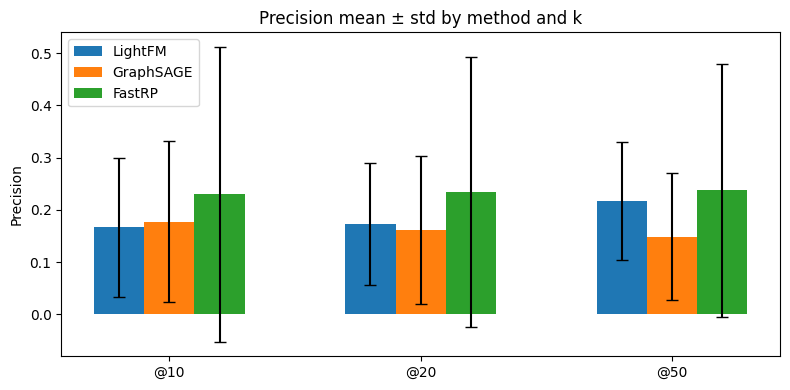

In [6]:
methods = prec_means.index.tolist()
ks = [10,20,50]
means_arr = prec_means[[f"Precision@{k}" for k in ks]].values
stds_arr  = prec_stds[[f"Precision@{k}" for k in ks]].values

x = np.arange(len(ks))
width = 0.2
fig, ax = plt.subplots(figsize=(8,4))
for i, m in enumerate(methods):
    ax.bar(x + (i-1)*width, means_arr[i], width, yerr=stds_arr[i], capsize=4, label=m)
ax.set_xticks(x); ax.set_xticklabels([f"@{k}" for k in ks])
ax.set_ylabel("Precision"); ax.set_title("Precision mean ± std by method and k")
ax.legend(); plt.tight_layout(); plt.show()

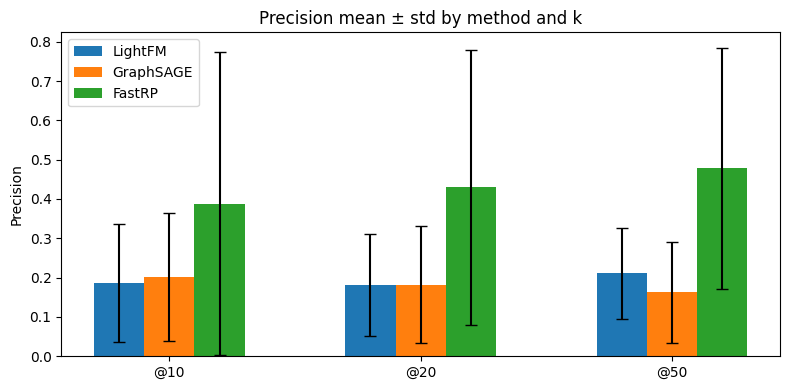

In [7]:
methods = ndcg_means.index.tolist()
ks = [10,20,50]
means_arr = ndcg_means[[f"NDCG@{k}" for k in ks]].values
stds_arr  = ndcg_stds[[f"NDCG@{k}" for k in ks]].values

x = np.arange(len(ks))
width = 0.2
fig, ax = plt.subplots(figsize=(8,4))
for i, m in enumerate(methods):
    ax.bar(x + (i-1)*width, means_arr[i], width, yerr=stds_arr[i], capsize=4, label=m)
ax.set_xticks(x); ax.set_xticklabels([f"@{k}" for k in ks])
ax.set_ylabel("Precision"); ax.set_title("Precision mean ± std by method and k")
ax.legend(); plt.tight_layout(); plt.show()

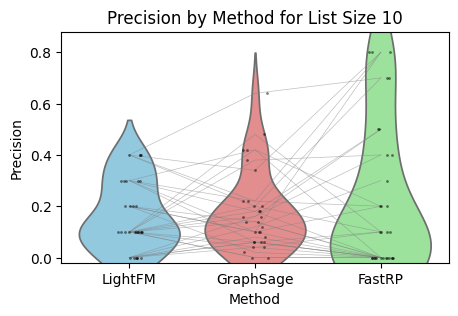

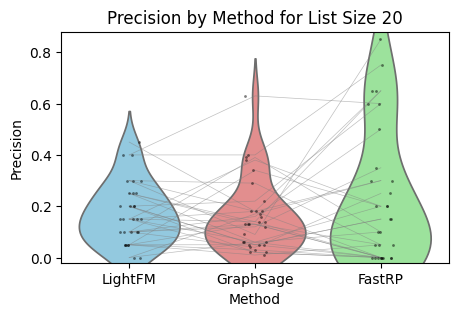

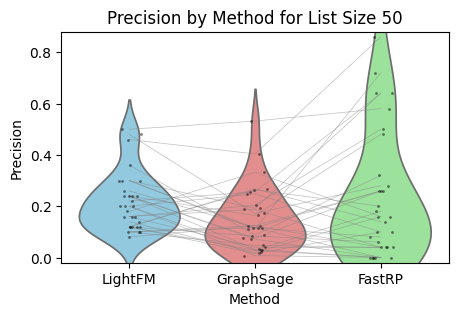

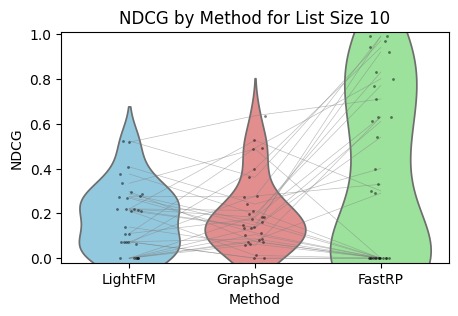

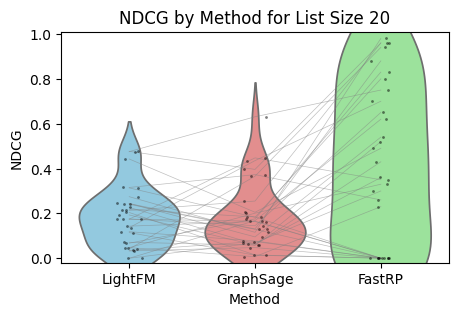

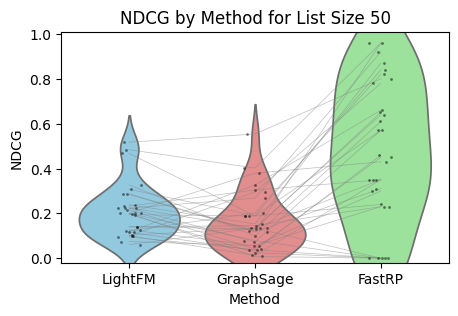

In [8]:
# Combine all precision data into a single DataFrame
precision_data = {
    'LightFM_10': lightfm_precision_10,
    'GraphSage_10': graphsage_precision_10,
    'FastRP_10': fastrp_precision_10,
    'LightFM_20': lightfm_precision_20,
    'GraphSage_20': graphsage_precision_20,
    'FastRP_20': fastrp_precision_20,
    'LightFM_50': lightfm_precision_50,
    'GraphSage_50': graphsage_precision_50,
    'FastRP_50': fastrp_precision_50,
}

precision_df = pd.DataFrame(precision_data)
precision_df = precision_df.melt(var_name='Method_ListSize', value_name='Precision')
precision_df[['Method', 'ListSize']] = precision_df['Method_ListSize'].str.split('_', expand=True)

# Combine all NDCG data into a single DataFrame
ndcg_data = {
    'LightFM_10': lightfm_ndcg_10,
    'GraphSage_10': graphsage_ndcg_10,
    'FastRP_10': fastrp_ndcg_10,
    'LightFM_20': lightfm_ndcg_20,
    'GraphSage_20': graphsage_ndcg_20,
    'FastRP_20': fastrp_ndcg_20,
    'LightFM_50': lightfm_ndcg_50,
    'GraphSage_50': graphsage_ndcg_50,
    'FastRP_50': fastrp_ndcg_50,
}

ndcg_df = pd.DataFrame(ndcg_data)
ndcg_df = ndcg_df.melt(var_name='Method_ListSize', value_name='NDCG')
ndcg_df[['Method', 'ListSize']] = ndcg_df['Method_ListSize'].str.split('_', expand=True)

# Add an ItemID column for connecting points
precision_df['ItemID'] = precision_df.groupby(['Method', 'ListSize']).cumcount()
ndcg_df['ItemID'] = ndcg_df.groupby(['Method', 'ListSize']).cumcount()

# Define a color palette for the methods
method_palette = {'LightFM': 'skyblue', 'GraphSage': 'lightcoral', 'FastRP': 'lightgreen'}

# Set a consistent y-axis limit for Precision plots
precision_ylim = (precision_df['Precision'].min() - 0.02, precision_df['Precision'].max() + 0.02)

# Create the violin plots for Precision
for list_size in precision_df['ListSize'].unique():
    plt.figure(figsize=(5, 3)) # Further reduced figure size
    subset_df = precision_df[precision_df['ListSize'] == list_size]
    sns.violinplot(x='Method', y='Precision', data=subset_df, inner=None, palette=method_palette, hue='Method') # Removed bw_adjust
    sns.stripplot(x='Method', y='Precision', data=subset_df, color='black', size=2, alpha=0.5) # Reduced dot size

    # Connect points for the same ItemID
    for item_id in subset_df['ItemID'].unique():
        item_data = subset_df[subset_df['ItemID'] == item_id]
        plt.plot(item_data['Method'], item_data['Precision'], color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

    plt.ylim(precision_ylim) # Apply consistent y-axis limit
    plt.title(f'Precision by Method for List Size {list_size}') # Simplified title
    plt.show()

# Set a consistent y-axis limit for NDCG plots
ndcg_ylim = (ndcg_df['NDCG'].min() - 0.02, ndcg_df['NDCG'].max() + 0.02)

# Create the violin plots for NDCG
for list_size in ndcg_df['ListSize'].unique():
    plt.figure(figsize=(5, 3)) # Further reduced figure size
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]
    sns.violinplot(x='Method', y='NDCG', data=subset_df, inner=None, palette=method_palette, hue='Method') # Removed bw_adjust
    sns.stripplot(x='Method', y='NDCG', data=subset_df, color='black', size=2, alpha=0.5) # Reduced dot size

    # Connect points for the same ItemID
    for item_id in subset_df['ItemID'].unique():
        item_data = subset_df[subset_df['ItemID'] == item_id]
        plt.plot(item_data['Method'], item_data['NDCG'], color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

    plt.ylim(ndcg_ylim) # Apply consistent y-axis limit
    plt.title(f'NDCG by Method for List Size {list_size}') # Simplified title
    plt.show()

Aparentemente as amostras não apresentam ter distribuição normal, devido aos altos valores de variância, complementados com as análises visuais dos gráficos de violin.
Portanto, é necessário realizar um testes para avaliar a normalidade dos dados, de modo a decidir sobre uso de teste paramétricos ou não paramétricos na avaliação das diferntes entre as amostras pareadas.

In [ ]:
# Teste de normalidade Shapiro-Wilk para diferenças pareadas

# Define a list of list sizes
list_sizes = precision_df['ListSize'].unique()

# Dictionary to store Shapiro-Wilk results
shapiro_results = {}

# Perform analysis for Precision
print("Shapiro-Wilk Test Results for Paired Differences (Precision):")
for list_size in list_sizes:
    subset_df = precision_df[precision_df['ListSize'] == list_size]

    # Calculate paired differences for the current list size
    precision_diff_lightfm_graphsage = subset_df[subset_df['Method'] == 'LightFM']['Precision'].values - subset_df[subset_df['Method'] == 'GraphSage']['Precision'].values
    precision_diff_lightfm_fastrp = subset_df[subset_df['Method'] == 'LightFM']['Precision'].values - subset_df[subset_df['Method'] == 'FastRP']['Precision'].values
    precision_diff_graphsage_fastrp = subset_df[subset_df['Method'] == 'GraphSage']['Precision'].values - subset_df[subset_df['Method'] == 'FastRP']['Precision'].values

    # Perform Shapiro-Wilk test
    shapiro_precision_lightfm_graphsage = shapiro(precision_diff_lightfm_graphsage)
    shapiro_precision_lightfm_fastrp = shapiro(precision_diff_lightfm_fastrp)
    shapiro_precision_graphsage_fastrp = shapiro(precision_diff_graphsage_fastrp)

    # Store and print results
    shapiro_results[f'Precision_LightFM_GraphSage_{list_size}'] = shapiro_precision_lightfm_graphsage
    shapiro_results[f'Precision_LightFM_FastRP_{list_size}'] = shapiro_precision_lightfm_fastrp
    shapiro_results[f'Precision_GraphSage_FastRP_{list_size}'] = shapiro_precision_graphsage_fastrp

    print(f"\nList Size {list_size}:")
    print(f"  LightFM - GraphSage: Statistics={shapiro_precision_lightfm_graphsage.statistic:.4f}, p-value={shapiro_precision_lightfm_graphsage.pvalue:.4f}")
    print(f"  LightFM - FastRP: Statistics={shapiro_precision_lightfm_fastrp.statistic:.4f}, p-value={shapiro_precision_lightfm_fastrp.pvalue:.4f}")
    print(f"  GraphSage - FastRP: Statistics={shapiro_precision_graphsage_fastrp.statistic:.4f}, p-value={shapiro_precision_graphsage_fastrp.pvalue:.4f}")

# Perform analysis for NDCG
print("\nShapiro-Wilk Test Results for Paired Differences (NDCG):")
for list_size in list_sizes:
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]

    # Calculate paired differences for the current list size
    ndcg_diff_lightfm_graphsage = subset_df[subset_df['Method'] == 'LightFM']['NDCG'].values - subset_df[subset_df['Method'] == 'GraphSage']['NDCG'].values
    ndcg_diff_lightfm_fastrp = subset_df[subset_df['Method'] == 'LightFM']['NDCG'].values - subset_df[subset_df['Method'] == 'FastRP']['NDCG'].values
    ndcg_diff_graphsage_fastrp = subset_df[subset_df['Method'] == 'GraphSage']['NDCG'].values - subset_df[subset_df['Method'] == 'FastRP']['NDCG'].values

    # Perform Shapiro-Wilk test
    shapiro_ndcg_lightfm_graphsage = shapiro(ndcg_diff_lightfm_graphsage)
    shapiro_ndcg_lightfm_fastrp = shapiro(ndcg_diff_lightfm_fastrp)
    shapiro_ndcg_graphsage_fastrp = shapiro(ndcg_diff_graphsage_fastrp)

    # Store and print results
    shapiro_results[f'NDCG_LightFM_GraphSage_{list_size}'] = shapiro_ndcg_lightfm_graphsage
    shapiro_results[f'NDCG_LightFM_FastRP_{list_size}'] = shapiro_ndcg_lightfm_fastrp
    shapiro_results[f'NDCG_GraphSage_FastRP_{list_size}'] = shapiro_ndcg_graphsage_fastrp

    print(f"\nList Size {list_size}:")
    print(f"  LightFM - GraphSage: Statistics={shapiro_ndcg_lightfm_graphsage.statistic:.4f}, p-value={shapiro_ndcg_lightfm_graphsage.pvalue:.4f}")
    print(f"  LightFM - FastRP: Statistics={shapiro_ndcg_lightfm_fastrp.statistic:.4f}, p-value={shapiro_ndcg_lightfm_fastrp.pvalue:.4f}")
    print(f"  GraphSage - FastRP: Statistics={shapiro_ndcg_graphsage_fastrp.statistic:.4f}, p-value={shapiro_ndcg_graphsage_fastrp.pvalue:.4f}")

Shapiro-Wilk Test Results for Paired Differences (Precision):

List Size 10:
  LightFM - GraphSage: Statistics=0.9538, p-value=0.2132
  LightFM - FastRP: Statistics=0.9360, p-value=0.0711
  GraphSage - FastRP: Statistics=0.9314, p-value=0.0536

List Size 20:
  LightFM - GraphSage: Statistics=0.9527, p-value=0.2001
  LightFM - FastRP: Statistics=0.9256, p-value=0.0375
  GraphSage - FastRP: Statistics=0.9339, p-value=0.0623

List Size 50:
  LightFM - GraphSage: Statistics=0.9643, p-value=0.3971
  LightFM - FastRP: Statistics=0.9150, p-value=0.0199
  GraphSage - FastRP: Statistics=0.9209, p-value=0.0282

Shapiro-Wilk Test Results for Paired Differences (NDCG):

List Size 10:
  LightFM - GraphSage: Statistics=0.9506, p-value=0.1755
  LightFM - FastRP: Statistics=0.9334, p-value=0.0606
  GraphSage - FastRP: Statistics=0.9362, p-value=0.0718

List Size 20:
  LightFM - GraphSage: Statistics=0.9517, p-value=0.1876
  LightFM - FastRP: Statistics=0.9485, p-value=0.1542
  GraphSage - FastRP: Stat

p-valor consistentemente maior que 0.05, ou seja, existe evidências estatísticas suficientes para concluir que os valores não seguem uma distribuição normal.
Deste modo, o mais indicado são testes não paramétricos (como o Friedman e o Nemenyi) para avaliar diferenças nas amostras.

In [ ]:
# Teste de Friedman para múltiplos grupos pareados (não paramétrico)

# Define a list of list sizes
list_sizes = precision_df['ListSize'].unique()

# Perform Friedman test for Precision
print("Friedman Test Results (Precision):")
for list_size in list_sizes:
    subset_df = precision_df[precision_df['ListSize'] == list_size]
    lightfm_data = subset_df[subset_df['Method'] == 'LightFM']['Precision'].values
    graphsage_data = subset_df[subset_df['Method'] == 'GraphSage']['Precision'].values
    fastrp_data = subset_df[subset_df['Method'] == 'FastRP']['Precision'].values

    friedman_precision = friedmanchisquare(lightfm_data, graphsage_data, fastrp_data)

    print(f"\nList Size {list_size}: Statistics={friedman_precision.statistic:.4f}, p-value={friedman_precision.pvalue:.4f}")

# Perform Friedman test for NDCG
print("\nFriedman Test Results (NDCG):")
for list_size in list_sizes:
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]
    lightfm_data = subset_df[subset_df['Method'] == 'LightFM']['NDCG'].values
    graphsage_data = subset_df[subset_df['Method'] == 'GraphSage']['NDCG'].values
    fastrp_data = subset_df[subset_df['Method'] == 'FastRP']['NDCG'].values

    friedman_ndcg = friedmanchisquare(lightfm_data, graphsage_data, fastrp_data)

    print(f"\nList Size {list_size}: Statistics={friedman_ndcg.statistic:.4f}, p-value={friedman_ndcg.pvalue:.4f}")

Friedman Test Results (Precision):

List Size 10: Statistics=0.0541, p-value=0.9733

List Size 20: Statistics=0.3652, p-value=0.8331

List Size 50: Statistics=1.9664, p-value=0.3741

Friedman Test Results (NDCG):

List Size 10: Statistics=1.0957, p-value=0.5782

List Size 20: Statistics=4.2000, p-value=0.1225

List Size 50: Statistics=21.6667, p-value=0.0000


Para quase todos os tamanho de listas, as diferenças não apresentaram diferença estatísica. Mas, uma grande diferença foi identificada na lista de NDCG de tamanho 50. Deste modo, é necessário aplicar um teste post hoc Nemeniy.

In [11]:
# Perform Nemenyi post-hoc test for Precision
print("Nemenyi Post-hoc Test Results (Precision):")
for list_size in precision_df['ListSize'].unique():
    subset_df = precision_df[precision_df['ListSize'] == list_size]
    # Reshape the data for scikit-posthocs: ItemID as index, Method as columns
    reshaped_df = subset_df.pivot(index='ItemID', columns='Method', values='Precision')

    # Perform Nemenyi test on the reshaped DataFrame
    # posthoc_nemenyi_friedman expects the data in this format for group comparisons
    nemenyi_precision = sp.posthoc_nemenyi_friedman(reshaped_df)

    print(f"\nList Size {list_size}:")
    display(nemenyi_precision)

# Perform Nemenyi post-hoc test for NDCG
print("\nNemenyi Post-hoc Test Results (NDCG):")
for list_size in ndcg_df['ListSize'].unique():
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]
    # Reshape the data for scikit-posthocs: ItemID as index, Method as columns
    reshaped_df = subset_df.pivot(index='ItemID', columns='Method', values='NDCG')

    # Perform Nemenyi test on the reshaped DataFrame
    nemenyi_ndcg = sp.posthoc_nemenyi_friedman(reshaped_df)

    print(f"\nList Size {list_size}:")
    display(nemenyi_ndcg)

Nemenyi Post-hoc Test Results (Precision):

List Size 10:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.979539,1.000000
GraphSage,0.979539,1.000000,0.979539
LightFM,1.000000,0.979539,1.000000



List Size 20:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.979539,0.920652
GraphSage,0.979539,1.000000,0.830322
LightFM,0.920652,0.830322,1.000000



List Size 50:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.920652,0.596988
GraphSage,0.920652,1.000000,0.364502
LightFM,0.596988,0.364502,1.000000



Nemenyi Post-hoc Test Results (NDCG):

List Size 10:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.596988,0.718650
GraphSage,0.596988,1.000000,0.979539
LightFM,0.718650,0.979539,1.000000



List Size 20:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.128493,0.268023
GraphSage,0.128493,1.000000,0.920652
LightFM,0.268023,0.920652,1.000000



List Size 50:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.000019,0.003576
GraphSage,0.000019,1.000000,0.400231
LightFM,0.003576,0.400231,1.000000


Para o tamanho de lista 50, o FastRP apresenta um desempenho estatisticamente superior tanto ao GraphSage quanto ao LightFM em termos de NDCG. 

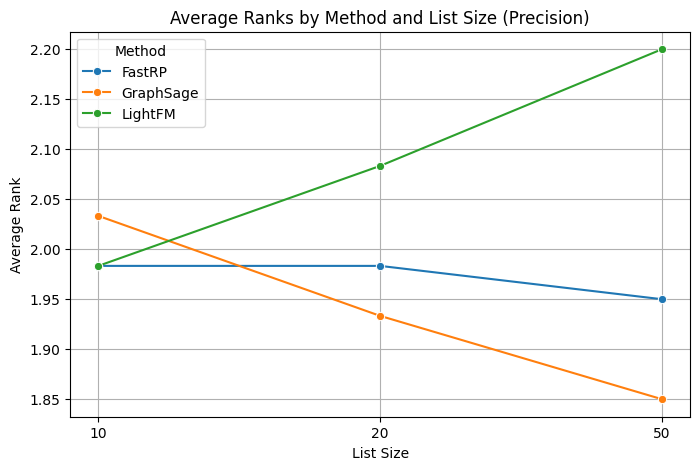

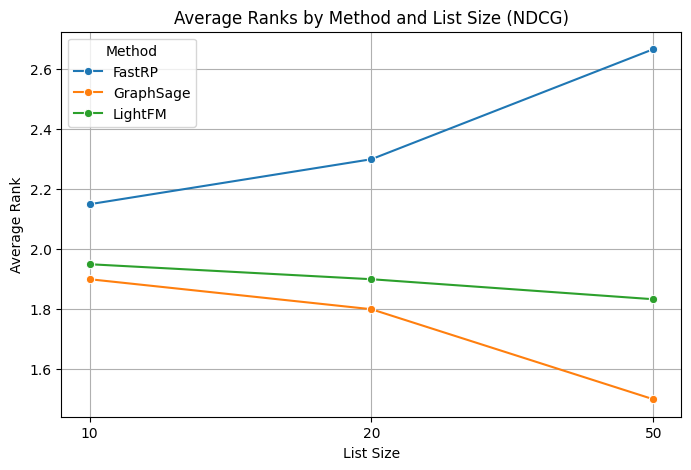

In [12]:
# Recalculate average ranks if not already available in the environment
# (This is a safeguard if the previous cell output is not directly accessible)

# Calculate average ranks for Precision
average_ranks_precision_list = []
for list_size in precision_df['ListSize'].unique():
    subset_df = precision_df[precision_df['ListSize'] == list_size]
    reshaped_df = subset_df.pivot(index='ItemID', columns='Method', values='Precision')
    ranked_df = reshaped_df.rank(axis=1, method='average')
    average_ranks = ranked_df.mean().reset_index()
    average_ranks['ListSize'] = list_size
    average_ranks['Metric'] = 'Precision'
    average_ranks_precision_list.append(average_ranks)

average_ranks_precision_df = pd.concat(average_ranks_precision_list)
average_ranks_precision_df.columns = ['Method', 'AverageRank', 'ListSize', 'Metric']


# Calculate average ranks for NDCG
average_ranks_ndcg_list = []
for list_size in ndcg_df['ListSize'].unique():
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]
    reshaped_df = subset_df.pivot(index='ItemID', columns='Method', values='NDCG')
    ranked_df = reshaped_df.rank(axis=1, method='average')
    average_ranks = ranked_df.mean().reset_index()
    average_ranks['ListSize'] = list_size
    average_ranks['Metric'] = 'NDCG'
    average_ranks_ndcg_list.append(average_ranks)

average_ranks_ndcg_df = pd.concat(average_ranks_ndcg_list)
average_ranks_ndcg_df.columns = ['Method', 'AverageRank', 'ListSize', 'Metric']

# Ensure ListSize is treated as a categorical variable for correct plotting order
average_ranks_precision_df['ListSize'] = pd.Categorical(average_ranks_precision_df['ListSize'], categories=['10', '20', '50'], ordered=True)
average_ranks_ndcg_df['ListSize'] = pd.Categorical(average_ranks_ndcg_df['ListSize'], categories=['10', '20', '50'], ordered=True)


# Create the line plot for Average Ranks (Precision)
plt.figure(figsize=(8, 5))
sns.lineplot(data=average_ranks_precision_df, x='ListSize', y='AverageRank', hue='Method', marker='o')

plt.title('Average Ranks by Method and List Size (Precision)')
plt.xlabel('List Size')
plt.ylabel('Average Rank')
plt.grid(True)
plt.show()

# Create the line plot for Average Ranks (NDCG)
plt.figure(figsize=(8, 5))
sns.lineplot(data=average_ranks_ndcg_df, x='ListSize', y='AverageRank', hue='Method', marker='o')

plt.title('Average Ranks by Method and List Size (NDCG)')
plt.xlabel('List Size')
plt.ylabel('Average Rank')
plt.grid(True)
plt.show()

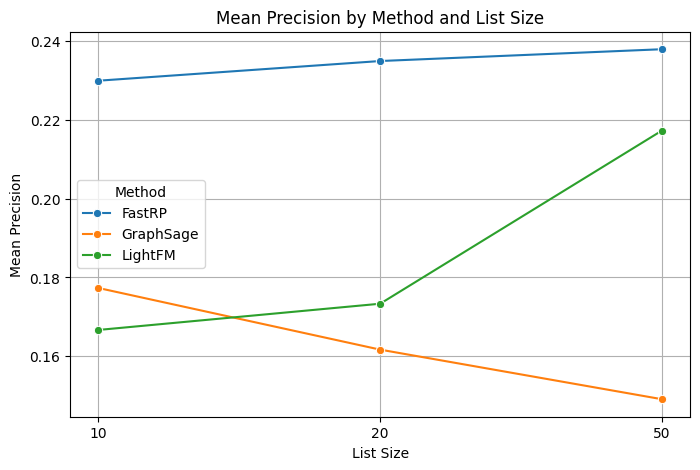

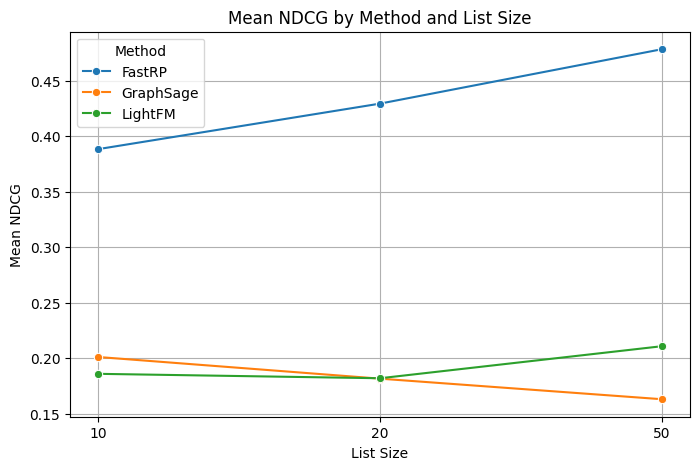

In [13]:
# Calculate raw means for Precision
mean_precision_list = []
for list_size in precision_df['ListSize'].unique():
    subset_df = precision_df[precision_df['ListSize'] == list_size]
    mean_values = subset_df.groupby('Method')['Precision'].mean().reset_index()
    mean_values['ListSize'] = list_size
    mean_values['Metric'] = 'Precision'
    mean_precision_list.append(mean_values)

mean_precision_df = pd.concat(mean_precision_list)
mean_precision_df.columns = ['Method', 'MeanValue', 'ListSize', 'Metric']


# Calculate raw means for NDCG
mean_ndcg_list = []
for list_size in ndcg_df['ListSize'].unique():
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]
    mean_values = subset_df.groupby('Method')['NDCG'].mean().reset_index()
    mean_values['ListSize'] = list_size
    mean_values['Metric'] = 'NDCG'
    mean_ndcg_list.append(mean_values)

mean_ndcg_df = pd.concat(mean_ndcg_list)
mean_ndcg_df.columns = ['Method', 'MeanValue', 'ListSize', 'Metric']

# Ensure ListSize is treated as a categorical variable for correct plotting order
mean_precision_df['ListSize'] = pd.Categorical(mean_precision_df['ListSize'], categories=['10', '20', '50'], ordered=True)
mean_ndcg_df['ListSize'] = pd.Categorical(mean_ndcg_df['ListSize'], categories=['10', '20', '50'], ordered=True)


# Create the line plot for Raw Means (Precision)
plt.figure(figsize=(8, 5))
sns.lineplot(data=mean_precision_df, x='ListSize', y='MeanValue', hue='Method', marker='o')

plt.title('Mean Precision by Method and List Size')
plt.xlabel('List Size')
plt.ylabel('Mean Precision')
plt.grid(True)
plt.show()

# Create the line plot for Raw Means (NDCG)
plt.figure(figsize=(8, 5))
sns.lineplot(data=mean_ndcg_df, x='ListSize', y='MeanValue', hue='Method', marker='o')

plt.title('Mean NDCG by Method and List Size')
plt.xlabel('List Size')
plt.ylabel('Mean NDCG')
plt.grid(True)
plt.show()